In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder

In [35]:
import pandas as pd
train = pd.read_csv('Train.csv')
test= pd.read_csv('Test.csv')
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [36]:
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [37]:
train = train.drop(['ID'],axis=1)
train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [38]:
test = test.drop('ID',axis=1)
test.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [39]:
train.columns[train.isna().any()].tolist()

['Ever_Married',
 'Graduated',
 'Profession',
 'Work_Experience',
 'Family_Size',
 'Var_1']

In [40]:
test.columns[test.isna().any()].tolist()

['Ever_Married',
 'Graduated',
 'Profession',
 'Work_Experience',
 'Family_Size',
 'Var_1']

In [41]:
cols_mode_impute =  ['Ever_Married','Graduated','Profession','Var_1']
train[cols_mode_impute] = train[cols_mode_impute].apply(lambda x: x.fillna(x.mode()[0]))
test[cols_mode_impute]= test[cols_mode_impute].apply(lambda x:x.fillna(x.mode()[0]))


In [42]:
print(train.columns[train.isna().any()].tolist())
print(test.columns[test.isna().any()].tolist())

['Work_Experience', 'Family_Size']
['Work_Experience', 'Family_Size']


In [43]:
"""cols_mode_impute = ['Ever_Married','Graduated','Profession','Var_1']
for col in cols_mode_impute:
  col_mode = train[col].mode()[0]
  train[col].fillna(col_mode,inplace=True)"""

#df[cols_mode_impute] = df[cols_mode_impute].apply(lambda x: x.fillna(mode(x)[0]))


"cols_mode_impute = ['Ever_Married','Graduated','Profession','Var_1']\nfor col in cols_mode_impute:\n  col_mode = train[col].mode()[0]\n  train[col].fillna(col_mode,inplace=True)"

In [44]:
def detect_outliers(column):
    threshold = 3
    z_score = (column-column.mean())/column.std()
    return(abs(z_score)>threshold).any()


In [45]:
numeric_cols_impute = ['Work_Experience', 'Family_Size']
bool_train_outliers = train[numeric_cols_impute].apply(lambda x: detect_outliers(x.dropna()))
bool_test_outliers = test[numeric_cols_impute].apply(lambda x: detect_outliers(x.dropna()))


In [46]:
print(f"Train_outliers: \n {bool_train_outliers}")
print(f"Test_outliers:  \n {bool_test_outliers}")

Train_outliers: 
 Work_Experience    True
Family_Size        True
dtype: bool
Test_outliers:  
 Work_Experience    True
Family_Size        True
dtype: bool


In [47]:
train[numeric_cols_impute] = train[numeric_cols_impute].apply(lambda x: x.fillna(x.median()))
test[numeric_cols_impute]= test[numeric_cols_impute].apply(lambda x: x.fillna(x.median()))

In [48]:
"""for col in numeric_cols_impute:
  median_impute = train[col].median()
  train[col].fillna(median_impute,inplace=True)"""

#df[numeric_cols_impute] = df[numeric_cols_impute].apply(lambda(x: x.fillna(median(x))))


'for col in numeric_cols_impute:\n  median_impute = train[col].median()\n  train[col].fillna(median_impute,inplace=True)'

In [49]:
print(train.columns[train.isna().any()].tolist())
print(test.columns[test.isna().any()].tolist())

[]
[]


In [50]:
train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A


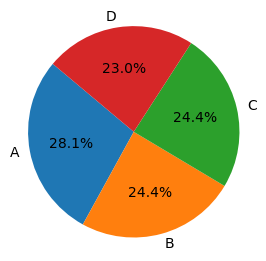

In [51]:
# Calculate the frequency of each category in the response variable
response_counts = train['Segmentation'].value_counts()

# Replace numerical labels with descriptive labels
response_labels = ['A', 'B', 'C', 'D']

# Map the response labels to the counts
response_counts.index = response_labels

# Plot the pie chart with modified labels
plt.figure(figsize=(3,3))
plt.pie(response_counts, labels=response_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

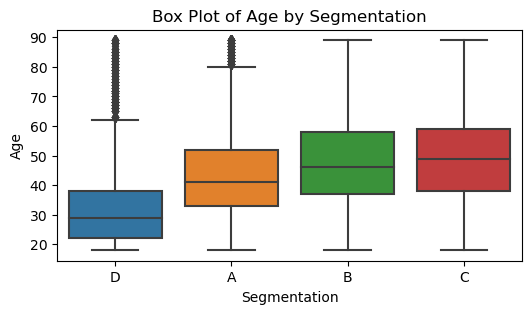

In [52]:
#Box plot of Age against Segmentation
plt.figure(figsize=(6, 3))
sns.boxplot(x='Segmentation', y='Age', data=train)

# Customize the plot
plt.title('Box Plot of Age by Segmentation')
plt.xlabel('Segmentation')
plt.ylabel('Age')

# Show the plot
plt.show()

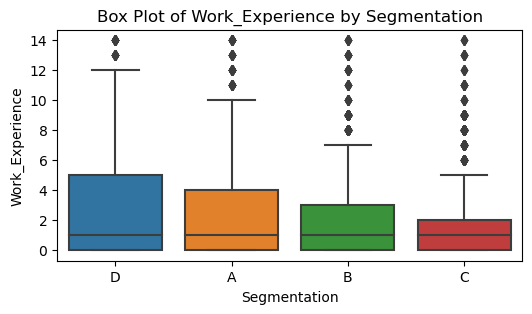

In [53]:
#Box plot of Work_Experience against Segmentation
plt.figure(figsize=(6,3))
sns.boxplot(x='Segmentation', y='Work_Experience', data=train)

# Customize the plot
plt.title('Box Plot of Work_Experience by Segmentation')
plt.xlabel('Segmentation')
plt.ylabel('Work_Experience')

# Show the plot
plt.show()

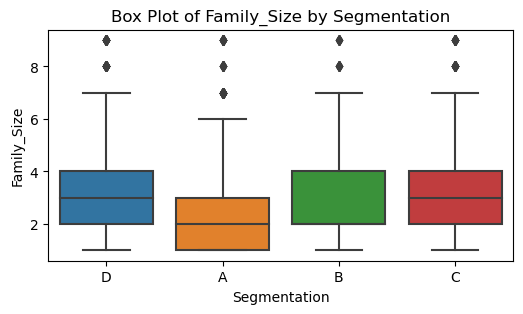

In [54]:
#Box plot of Family size against Segmentation
plt.figure(figsize=(6,3))
sns.boxplot(x='Segmentation', y='Family_Size', data=train)

# Customize the plot
plt.title('Box Plot of Family_Size by Segmentation')
plt.xlabel('Segmentation')
plt.ylabel('Family_Size')

# Show the plot
plt.show()

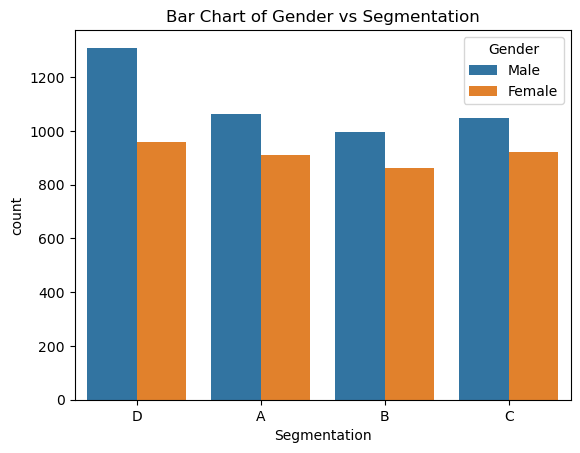

In [55]:
# Plot clustered bar chart
sns.countplot(x='Segmentation', hue='Gender', data=train)
plt.title('Bar Chart of Gender vs Segmentation')
plt.show()

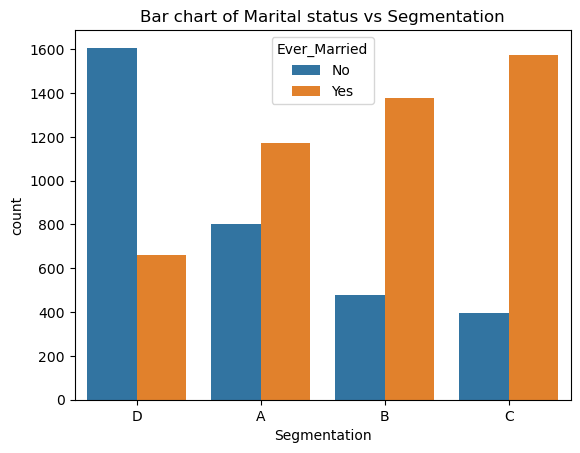

In [56]:
# Plot clustered bar chart
sns.countplot(x='Segmentation', hue='Ever_Married', data=train)
plt.title('Bar chart of Marital status vs Segmentation')
plt.show()

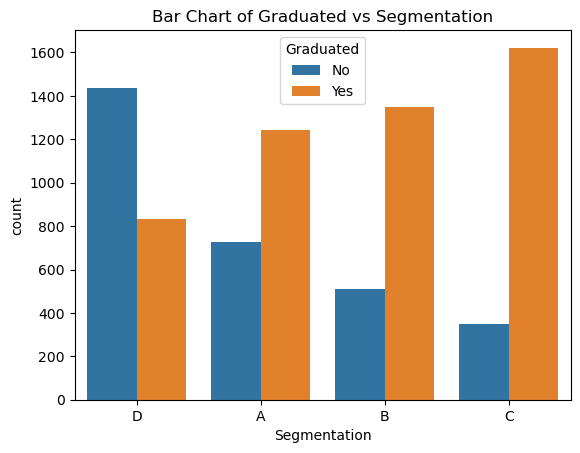

In [57]:
# Plot clustered bar chart
sns.countplot(x='Segmentation', hue='Graduated', data=train)
plt.title('Bar Chart of Graduated vs Segmentation')
plt.show()

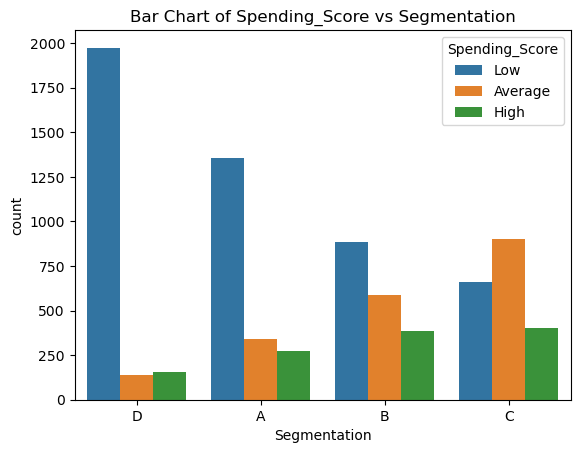

In [58]:
# Plot clustered bar chart
sns.countplot(x='Segmentation', hue='Spending_Score', data=train)
plt.title('Bar Chart of Spending_Score vs Segmentation')
plt.show()

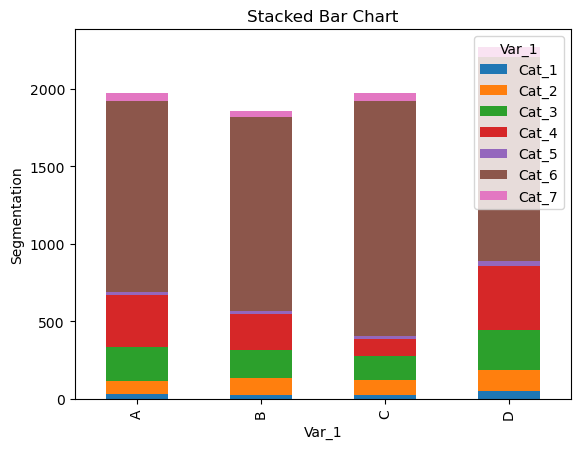

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a contingency table
contingency_table = pd.crosstab(train['Segmentation'], train['Var_1'])

# Plot stacked bar chart without the legend
contingency_table.plot(kind='bar', stacked=True)

# Customize the plot
plt.title('Stacked Bar Chart')
plt.xlabel('Var_1')
plt.ylabel('Segmentation')

# Show the plot
plt.show()


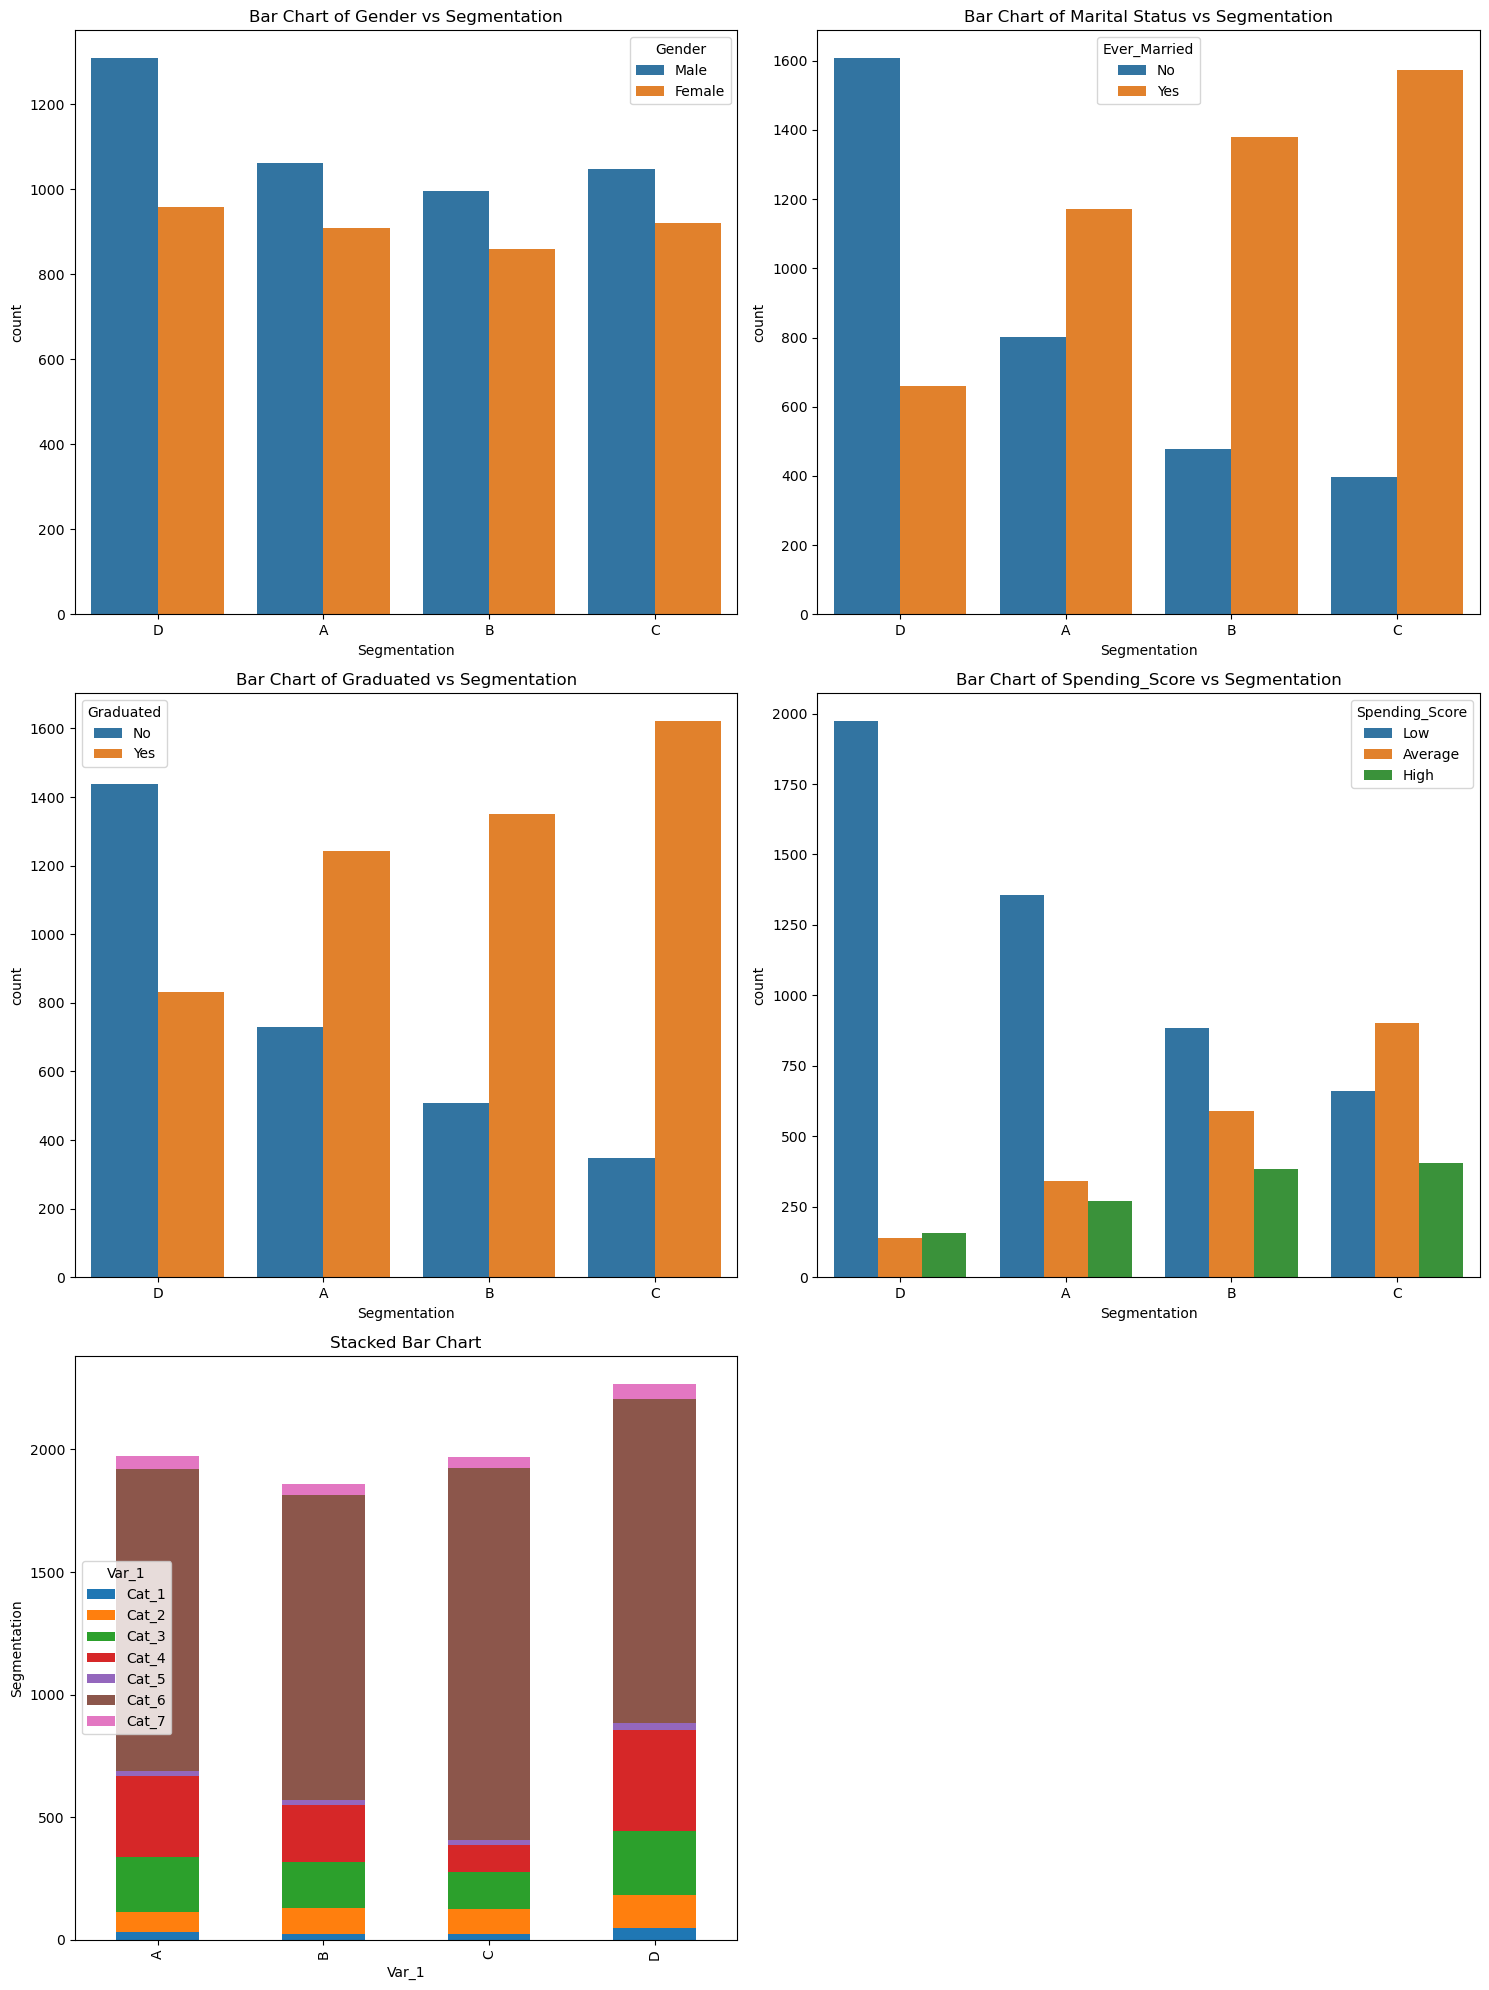

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a figure with a specified size
fig = plt.figure(figsize=(15, 20))

# Plot clustered bar chart: Gender vs Segmentation
plt.subplot(3, 2, 1)
sns.countplot(x='Segmentation', hue='Gender', data=train)
plt.title('Bar Chart of Gender vs Segmentation')

# Plot clustered bar chart: Ever_Married vs Segmentation
plt.subplot(3, 2, 2)
sns.countplot(x='Segmentation', hue='Ever_Married', data=train)
plt.title('Bar Chart of Marital Status vs Segmentation')

# Plot clustered bar chart: Graduated vs Segmentation
plt.subplot(3, 2, 3)
sns.countplot(x='Segmentation', hue='Graduated', data=train)
plt.title('Bar Chart of Graduated vs Segmentation')

# Plot clustered bar chart: Spending_Score vs Segmentation
plt.subplot(3, 2, 4)
sns.countplot(x='Segmentation', hue='Spending_Score', data=train)
plt.title('Bar Chart of Spending_Score vs Segmentation')

# Create a contingency table
contingency_table = pd.crosstab(train['Segmentation'], train['Var_1'])

# Plot stacked bar chart without the legend
plt.subplot(3, 2, 5)
contingency_table.plot(kind='bar', stacked=True, legend=True, ax=plt.gca())
plt.title('Stacked Bar Chart')
plt.xlabel('Var_1')
plt.ylabel('Segmentation')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

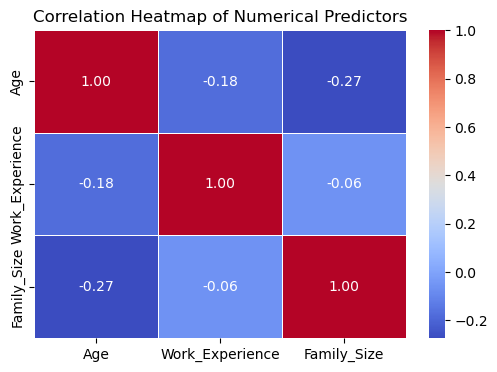

In [61]:
# Numerical predictors
num_predictors = ['Age', 'Work_Experience', 'Family_Size']

# Calculate the correlation matrix
corr_matrix = train[num_predictors].corr()

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Predictors')
plt.show()

C:\Users\Gokulan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


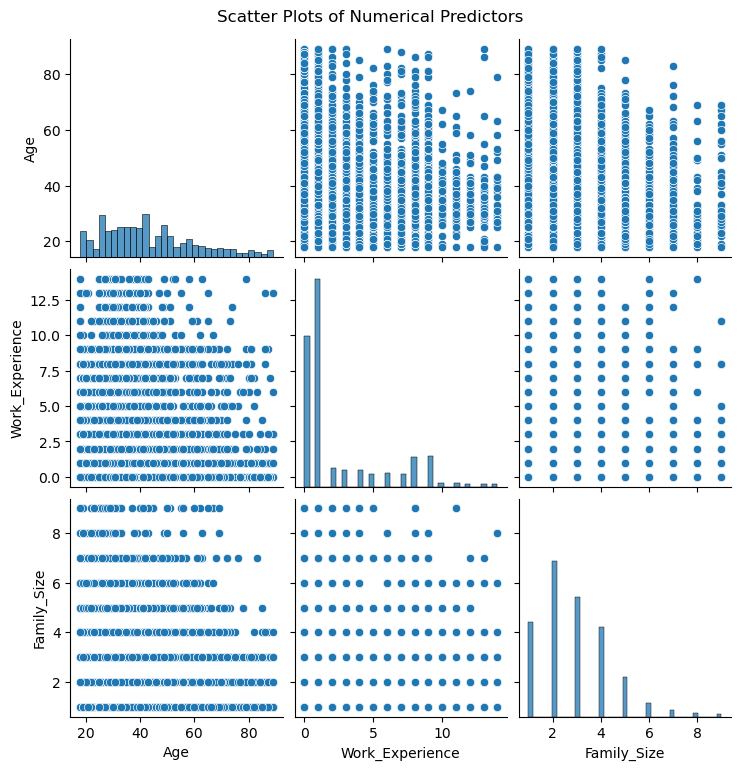

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'train' is your DataFrame with the numerical predictors
num_predictors = ['Age', 'Work_Experience', 'Family_Size']

# Create a pair plot for the numerical predictors with a smaller size
pair_plot = sns.pairplot(train[num_predictors], height=2.5)  # Adjust height to change size
pair_plot.fig.suptitle('Scatter Plots of Numerical Predictors', y=1.02)
plt.show()


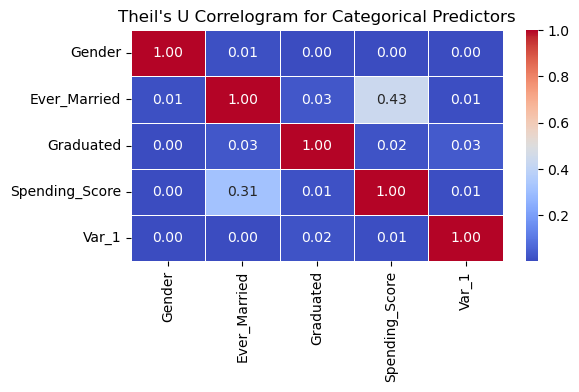

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy

def conditional_entropy(x, y):
    """ Calculate the conditional entropy of x given y: S(x|y) """
    y_counter = np.unique(y, return_counts=True)[1]
    unique_y = np.unique(y)
    xy_counter = [np.unique(x[y == val], return_counts=True)[1] for val in unique_y]
    max_length = max(len(c) for c in xy_counter)
    xy_counter_padded = [np.pad(c, (0, max_length - len(c)), 'constant') for c in xy_counter]
    return np.sum([np.sum(c) / np.sum(y_counter) * entropy(c) for c in xy_counter_padded])

def theils_u(x, y):
    """ Calculate Theil's U statistic (Uncertainty coefficient) for categorical-categorical association """
    s_xy = conditional_entropy(x, y)
    x_entropy = entropy(np.unique(x, return_counts=True)[1])
    if x_entropy == 0:
        return 1
    else:
        return (x_entropy - s_xy) / x_entropy

# Sample categorical predictors (replace with your actual categorical predictor names)
cat_predictors = ['Gender', 'Ever_Married', 'Graduated', 'Spending_Score', 'Var_1']

# Compute Theil's U values
theils_u_matrix = pd.DataFrame(index=cat_predictors, columns=cat_predictors)

for i, predictor1 in enumerate(cat_predictors):
    for j, predictor2 in enumerate(cat_predictors):
        if i == j:
            theils_u_matrix.iloc[i, j] = 1.0
        else:
            theils_u_matrix.iloc[i, j] = theils_u(train[predictor1], train[predictor2])

theils_u_matrix = theils_u_matrix.apply(pd.to_numeric)

# Plot the correlogram
plt.figure(figsize=(6,3))
sns.heatmap(theils_u_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Theil's U Correlogram for Categorical Predictors")
plt.show()